## Simple robot simulation using the Python PyFRC simulation library
It is not the most accurate, but it seems to give reasonable results

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

In [2]:
# if needed, the path to the PyFRC library
import sys
sys.path.insert(1, '/home/ligerbots/software/kalman/pyfrc/lib')

from pyfrc.physics import motor_cfgs, tankmodel
from pyfrc.physics.units import units

Hi from paul


In [3]:
tstep = 0.05
start_pos = (0, 0, 0)    # x, y, angle

# Define the path
# time, left motor, right motor
s_curve = ((0, 1.0, 1.0),
        (2.0, 1.0, 0.5),
        (2.5, 1.0, 1.0),
        (3.0, 0.5, 1.0),
        (3.55, 1.0, 1.0),
        (5.0, 0, 0))

In [4]:
bumper_width = 4*units.inch
robot = tankmodel.TankModel.theory(
            motor_cfgs.MOTOR_CFG_CIM,           # motor configuration
            125*units.lbs,                      # robot mass
            10.71,                              # drivetrain gear ratio
            2,                                  # motors per side
            22*units.inch,                      # robot wheelbase
            23*units.inch + bumper_width*2,     # robot width
            32*units.inch + bumper_width*2,     # robot length
            4*units.inch                        # wheel diameter
        )
#robot.inertia = 125*units.lbs * (22*units.inch)**2

In [5]:
outfile_name = 'sim_fast_s_turn.csv'
path = s_curve

In [6]:
time = 0
path_step = 0
curr_pos = 8*[0.0, ]
robot_path = [np.copy(curr_pos), ]
while True:
    curr_pos[0] += tstep
    if curr_pos[0] >= path[path_step+1][0]:
        path_step += 1
    if path_step == len(path) - 1:
        break
    delta = robot.get_distance(-path[path_step][1], path[path_step][2], tstep)
    curr_pos[3] += delta[2]
    curr_pos[4] = robot.l_position
    curr_pos[5] = robot.r_position
    curr_pos[6] = path[path_step][1]
    curr_pos[7] = path[path_step][2]
    
    c = math.cos(curr_pos[3])
    s = math.sin(curr_pos[3])
            
    curr_pos[1] += (delta[0]*c - delta[1]*s)
    curr_pos[2] += (delta[0]*s + delta[1]*c)
    robot_path.append(np.copy(curr_pos))

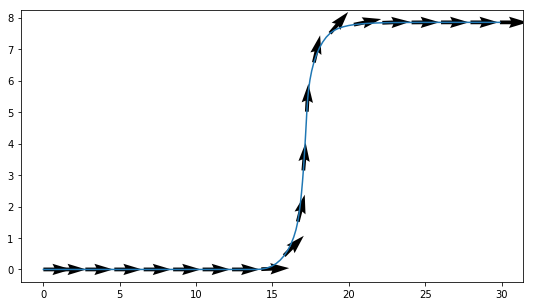

In [7]:
x = [r[1] for r in robot_path]
y = [r[2] for r in robot_path]
plt.rcParams['figure.figsize'] = (9,5)
plt.plot(x,y)

vx = [math.cos(r[3]) for r in robot_path]
vy = [math.sin(r[3]) for r in robot_path]
# only put an arrow every 5th point
plt.quiver(x[::5], y[::5], vx[::5], vy[::5], angles='xy');

In [8]:
fout = open(outfile_name, 'w')
outcsv = csv.writer(fout)
outcsv.writerow(['Time', 'X', 'Y', 'Angle', 'EncoderLeft', 'EncoderRight', 'Motor_Left', 'Motor_Right'])
for r in robot_path:
    outcsv.writerow(r)
fout.close()